

1.   Load the data and load all the libraries
2.   Data Preparation and Data transformation
     1. Convert all text into LowerCase
     2. Remove all special characters
     3. Remove stop words
     4. Lemmatization and Stemming
3.   Vectorization
     1. TFIDF Vectorizer
4.   Machine Learning and also Deep Learning



In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
df = pd.read_csv('spam.csv', encoding = 'latin-1')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [34]:
df1 = df.drop(df.columns[[2,3,4]], axis = 1)

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


<Axes: >

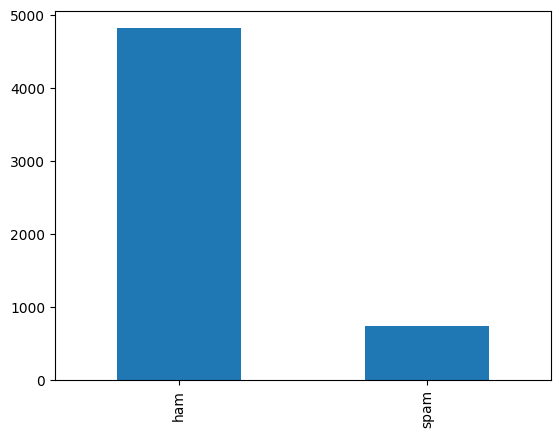

In [36]:
df1['v1'].value_counts().plot(kind='bar')

In [37]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

In [38]:
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
nltk.download('wordnet')
def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
df1['v2'] = df1['v2'].map(lambda s:preprocess(s))

In [41]:
df1['v2']

0       jurong point crazy available bugis great world...
1                                      lar joking wif oni
2       free entry wkly comp win cup final tkts may te...
3                           dun say early hor already say
4                  nah think goes usf lives around though
                              ...                        
5567    time tried contact pound prize claim easy call...
5568                                 going esplanade home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: v2, Length: 5572, dtype: object

In [42]:
df['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5572, dtype: object

Vectorize the text

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [44]:
x = vect.fit_transform(df1['v2'])

In [45]:
x.shape

(5572, 7386)

In [46]:
type(x)

scipy.sparse._csr.csr_matrix

In [47]:
le = LabelEncoder()

In [48]:
y = le.fit_transform(df1['v1'])

Split data into train and test

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 123)

In [50]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 7386)
(1115, 7386)
(4457,)
(1115,)


In [51]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [52]:
random_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

In [53]:
rf = RandomForestClassifier()

In [54]:
clf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, verbose = 2, random_state=123)

In [55]:
search = clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   4.6s
[CV] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   3.6s
[CV] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   3.5s
[CV] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   4.5s
[CV] END criterion=gini, max_depth=70, min_samples_leaf=2, min_samples_split=2, n_estimators=180; total time=   3.7s
[CV] END criterion=entropy, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=230; total time=   6.4s
[CV] END criterion=entropy, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=230; total time=   8.8s
[CV] END criterion=entropy, max_depth=90, min_samples_leaf=2, min_samples_split=2, n_estimators=230; total time=  

In [56]:
search.best_params_

{'n_estimators': 230,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 70,
 'criterion': 'gini'}

In [57]:
search.best_score_

0.9762148138082368

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 230,max_depth = 3,min_samples_split= 10,
 min_samples_leaf= 1,criterion = 'gini',verbose = 2)
rf.fit(x_train,y_train)
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

building tree 1 of 230
building tree 2 of 230
building tree 3 of 230
building tree 4 of 230
building tree 5 of 230
building tree 6 of 230
building tree 7 of 230
building tree 8 of 230
building tree 9 of 230
building tree 10 of 230
building tree 11 of 230
building tree 12 of 230
building tree 13 of 230
building tree 14 of 230
building tree 15 of 230
building tree 16 of 230
building tree 17 of 230
building tree 18 of 230
building tree 19 of 230
building tree 20 of 230
building tree 21 of 230
building tree 22 of 230
building tree 23 of 230
building tree 24 of 230
building tree 25 of 230
building tree 26 of 230
building tree 27 of 230
building tree 28 of 230
building tree 29 of 230
building tree 30 of 230
building tree 31 of 230
building tree 32 of 230
building tree 33 of 230
building tree 34 of 230
building tree 35 of 230
building tree 36 of 230
building tree 37 of 230
building tree 38 of 230
building tree 39 of 230
building tree 40 of 230
building tree 41 of 230
building tree 42 of 230
b

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.1s


building tree 58 of 230
building tree 59 of 230
building tree 60 of 230
building tree 61 of 230
building tree 62 of 230
building tree 63 of 230
building tree 64 of 230
building tree 65 of 230
building tree 66 of 230
building tree 67 of 230
building tree 68 of 230
building tree 69 of 230
building tree 70 of 230
building tree 71 of 230
building tree 72 of 230
building tree 73 of 230
building tree 74 of 230
building tree 75 of 230
building tree 76 of 230
building tree 77 of 230
building tree 78 of 230
building tree 79 of 230
building tree 80 of 230
building tree 81 of 230
building tree 82 of 230
building tree 83 of 230
building tree 84 of 230
building tree 85 of 230
building tree 86 of 230
building tree 87 of 230
building tree 88 of 230
building tree 89 of 230
building tree 90 of 230
building tree 91 of 230
building tree 92 of 230
building tree 93 of 230
building tree 94 of 230
building tree 95 of 230
building tree 96 of 230
building tree 97 of 230
building tree 98 of 230
building tree 99

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.6s


building tree 183 of 230
building tree 184 of 230
building tree 185 of 230
building tree 186 of 230
building tree 187 of 230
building tree 188 of 230
building tree 189 of 230
building tree 190 of 230
building tree 191 of 230
building tree 192 of 230
building tree 193 of 230
building tree 194 of 230
building tree 195 of 230
building tree 196 of 230
building tree 197 of 230
building tree 198 of 230
building tree 199 of 230
building tree 200 of 230
building tree 201 of 230
building tree 202 of 230
building tree 203 of 230
building tree 204 of 230
building tree 205 of 230
building tree 206 of 230
building tree 207 of 230
building tree 208 of 230
building tree 209 of 230
building tree 210 of 230
building tree 211 of 230
building tree 212 of 230
building tree 213 of 230
building tree 214 of 230
building tree 215 of 230
building tree 216 of 230
building tree 217 of 230
building tree 218 of 230
building tree 219 of 230
building tree 220 of 230
building tree 221 of 230
building tree 222 of 230


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.0s


In [60]:
print('Train accuracy score of the model is: ', round(accuracy_score(y_train,preds_rf_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(y_test, preds_rf_test),2))

Train accuracy score of the model is:  0.86
Test accuracy score of the model is:  0.88


Application of NB Classifier

In [61]:
from sklearn.naive_bayes import MultinomialNB

In [62]:
nb = MultinomialNB()

In [63]:
nb.fit(x_train.toarray(), y_train)
nb_preds_train = nb.predict(x_train.toarray())
nb_preds_test = nb.predict(x_test.toarray())
print('Train accuracy score of the model is: ', round(accuracy_score(y_train, nb_preds_train),2))
print('Test accuracy score of the model is: ', round(accuracy_score(y_test, nb_preds_test),2))

Train accuracy score of the model is:  0.98
Test accuracy score of the model is:  0.97


In [64]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 28.0 MB/s eta 0:00:00


In [65]:
from transformers import pipeline

In [66]:
pipe = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [67]:
df1['v2'][0]

'jurong point crazy available bugis great world buffet cine got amore wat'

In [68]:
preds = pipe(str(df1['v2'][0]))

In [69]:
print(preds)

[{'label': 'NEGATIVE', 'score': 0.983607292175293}]


In [74]:
!pip install gradio
import gradio as gr
from transformers import pipeline

classifier = pipeline("text-classification")

def classify_message(message):
    result = classifier(message)
    label = result[0]['label']
    score = result[0]['score']
    return f"Predicted Label: {label}, Confidence Score: {score:.2f}"

iface = gr.Interface(fn=classify_message, inputs="text", outputs="text")
iface.launch(share=True)


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://9e513944487362a594.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
